<a href="https://colab.research.google.com/github/rana-elzahy/keras/blob/main/Fashion_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']    


4431872/4422102 [==============================] - 0s 0us/step


In [4]:
print(train_images.shape)
print(len(train_labels))
print(train_labels)
print(test_images.shape)
print(len(test_labels))

(60000, 28, 28)
60000
[9 0 0 ... 3 0 5]
(10000, 28, 28)
10000


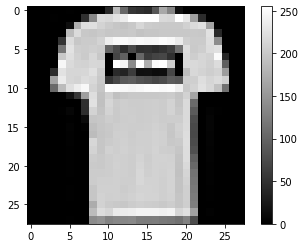

In [5]:
plt.figure()
plt.imshow(train_images[1],cmap='gray')
plt.colorbar()
plt.show()

In [6]:
train_images = train_images / 255.0
test_images = test_images / 255.0

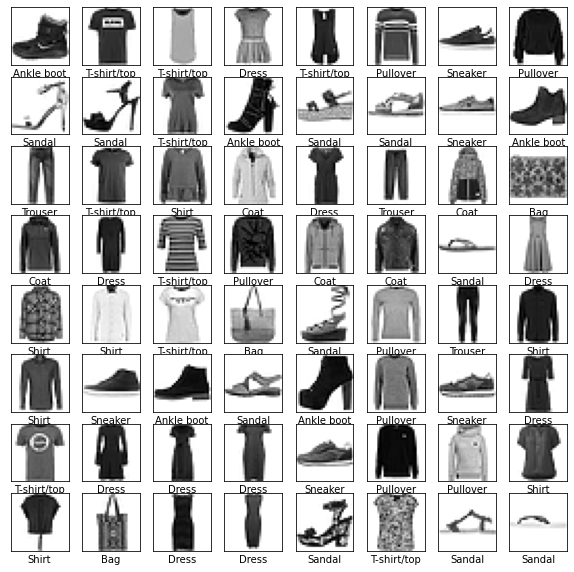

In [7]:
plt.figure(figsize=(10,10))
for i in range(64):
    plt.subplot(8,8,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [8]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(256, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4825 - accuracy: 0.8289
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3635 - accuracy: 0.8671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3253 - accuracy: 0.8804
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3020 - accuracy: 0.8881
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2837 - accuracy: 0.8950


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3539 - accuracy: 0.8743
Test accuracy: 0.8743000030517578


In [13]:
predictions = model.predict(test_images)
print(predictions[1])
print(np.argmax(predictions[1]))
print(test_labels[1])

[7.8149831e-05 3.2324633e-11 9.9920100e-01 4.9167609e-10 6.0493703e-04
 5.7149844e-11 1.1590668e-04 4.2204864e-12 4.0027360e-11 8.1596908e-12]
2
2
